In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,4.,5.])

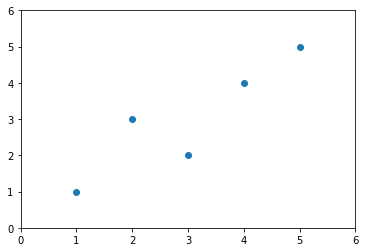

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6]) # 坐标轴
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num / d
b = y_mean - a * x_mean

In [7]:
a

0.9

In [8]:
b

0.2999999999999998

In [9]:
y_hat = a * x + b

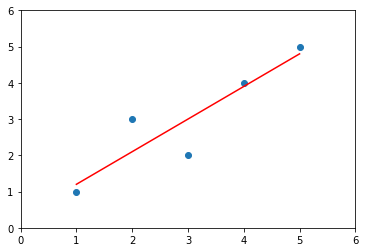

In [10]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0,6,0,6])
plt.show()

In [12]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.7

## 实现向量化运算

In [15]:
class SimpleLinearRegression:
    def __init__(self):
        self.b_ = None
        self.a_ = None
    def fit(self, x_train, y_train):
        """根据训练数据集x_train, y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean
        return self
                
    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x，返回x的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression()"

### 非向量化运算

In [17]:
def fit(x, y):
    num = 0.0
    d = 0.0
    for x_i, y_i in zip(x, y):
        num += (x_i - x_mean) * (y_i - y_mean)
        d += (x_i - x_mean) ** 2
    a = num / d
    b = y_mean - a * x_mean

In [18]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

### 性能比较

In [19]:
reg = SimpleLinearRegression()

In [21]:
%time fit(big_x, big_y)
%time reg.fit(big_x, big_y)

Wall time: 1.15 s
Wall time: 19.9 ms


SimpleLinearRegression()

# 衡量回归算法的标准

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [23]:
boston = datasets.load_boston()

In [24]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [25]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
x = boston.data[:, 5]

In [27]:
x.shape

(506,)

In [28]:
y = boston.target

In [29]:
y.shape

(506,)

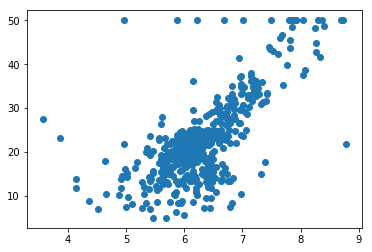

In [31]:
plt.scatter(x, y)
plt.show()

根据实际情况对数据取最大值限制

In [32]:
np.max(y)

50.0

In [33]:
x = x[y < 50.0]
y = y[y < 50.0]

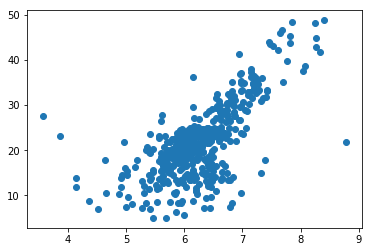

In [34]:
plt.scatter(x, y)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [46]:
x_train.shape

(367,)

In [47]:
x_test.shape

(123,)

In [48]:
y_train.shape

(367,)

In [49]:
reg = SimpleLinearRegression()

In [50]:
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [51]:
reg.a_

7.833972917686114

In [52]:
reg.b_

-27.252755266879902

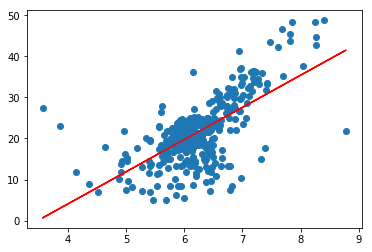

In [53]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [54]:
y_predict = reg.predict(x_test)

In [55]:
y_predict

array([23.12752457, 23.18236238, 19.24970797, 29.03434015, 25.62656193,
        5.16422467, 24.69431915, 26.49613292, 15.58340865, 28.39978834,
       17.34605255, 13.13137512, 24.02843145, 21.4118845 , 23.32337389,
       21.7017415 , 21.26303901, 19.9939354 , 22.4538029 , 25.20352739,
       19.56306689, 24.17727694, 24.60031148, 19.12436441, 23.1745284 ,
       28.79932096, 20.50314364, 18.23912547, 15.99077524, 29.47304263,
       31.65872107, 19.4142214 , 16.82901034, 38.05907695, 19.77458416,
       21.0358538 , 18.32529917, 24.25561667, 21.70957547, 22.74365989,
       21.26303901, 19.22620605, 15.47373303, 19.46122524, 16.63316102,
       23.16669443, 23.74640843, 30.1467643 , 18.04327614, 24.72565504,
       19.47689319, 25.45421452, 22.75149387, 16.59399115, 19.17920222,
       18.87367727, 22.19528179, 18.60732219, 25.06251588, 29.53571441,
       18.80317152, 19.73541429, 18.64649206, 14.65116587, 18.8658433 ,
       24.68648518, 20.87917434, 19.821588  , 27.90624805, 19.37

### MSE

In [56]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

28.215949368640796

### RMSE

In [57]:
from math import sqrt

In [58]:
rmse_test = sqrt(mse_test)
rmse_test  # 平均误差在5.3万美元左右

5.311868726600912

### MAE

In [60]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test # 平均误差在3.9万美元左右，与RMSE不同可以在数学上解释（计算方式）

3.9489046062737843

## scikit-learn中的MSE和MAE

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [62]:
mean_squared_error(y_test, y_predict)

28.215949368640796

In [63]:
mean_absolute_error(y_test, y_predict)

3.9489046062737843